<a href="https://colab.research.google.com/github/SahilK001/Exploratory-Data-Analysis/blob/main/KNN_nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
## Import the essential libraries 
# Step 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [5]:
# Step 2
# upload data
from google.colab import files
uploded = files.upload()


Saving iris.csv to iris.csv


In [ ]:
# Step 2 Visualize the data

In [7]:
data = pd.read_csv("iris.csv")

In [8]:
data.head(6)

,Unnamed: 5,sepal.length,sepal.width,petal.length,petal.width,variety
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,5.0,3.6,1.4,0.2,Setosa
5,6,5.4,3.9,1.7,0.4,Setosa


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 5    150 non-null    int64  
 1   sepal.length  150 non-null    float64
 2   sepal.width   150 non-null    float64
 3   petal.length  150 non-null    float64
 4   petal.width   150 non-null    float64
 5   variety       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
data.describe()

,Unnamed: 5,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
data["variety"].value_counts()

Virginica     50
Setosa        50
Versicolor    50
Name: variety, dtype: int64

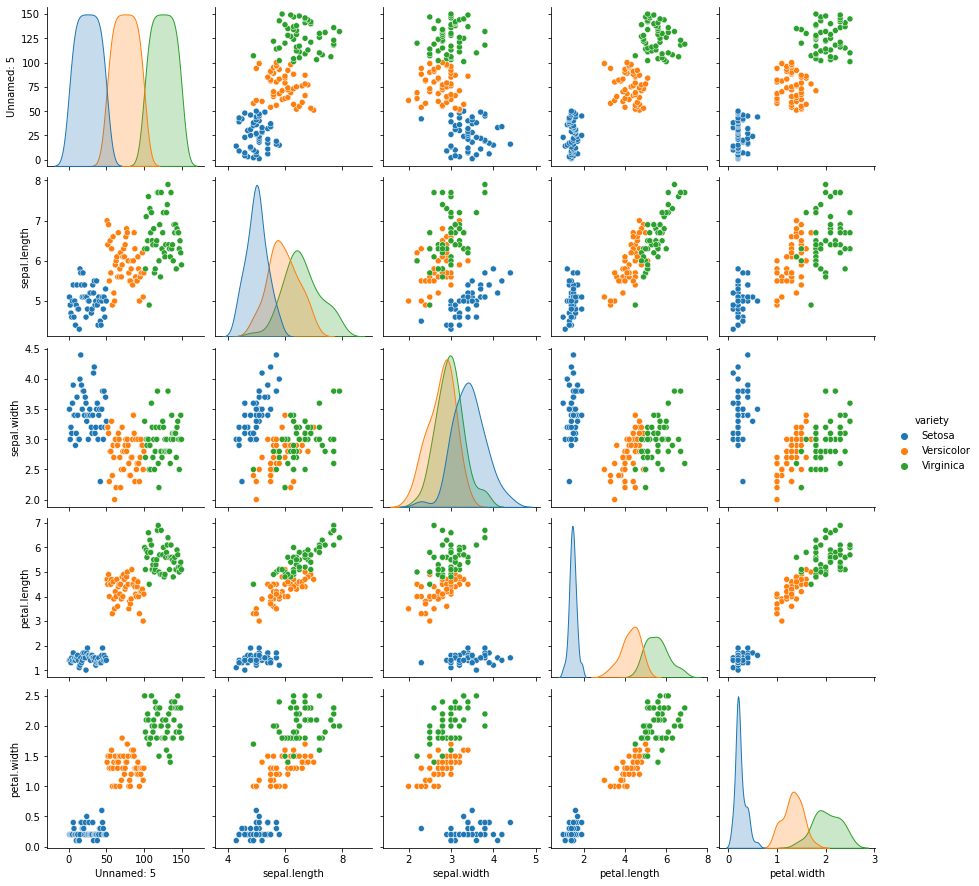

In [14]:
sns.pairplot(data,hue='variety')

In [18]:
x = data.drop(['Unnamed: 5','variety'],axis=1)

In [19]:
x

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y=data['variety']
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 5)

In [23]:
x_test.shape

(45, 4)

In [24]:
y_train

126     Virginica
61     Versicolor
124     Virginica
117     Virginica
20         Setosa
          ...    
8          Setosa
73     Versicolor
144     Virginica
118     Virginica
99     Versicolor
Name: variety, Length: 105, dtype: object

In [26]:
y_test.shape

(45,)

In [25]:
y_test

82     Versicolor
134     Virginica
114     Virginica
42         Setosa
109     Virginica
57     Versicolor
1          Setosa
70     Versicolor
25         Setosa
84     Versicolor
66     Versicolor
133     Virginica
102     Virginica
107     Virginica
26         Setosa
23         Setosa
123     Virginica
130     Virginica
21         Setosa
12         Setosa
71     Versicolor
128     Virginica
48         Setosa
72     Versicolor
88     Versicolor
148     Virginica
74     Versicolor
96     Versicolor
63     Versicolor
132     Virginica
39         Setosa
53     Versicolor
79     Versicolor
10         Setosa
50     Versicolor
49         Setosa
43         Setosa
135     Virginica
40         Setosa
115     Virginica
142     Virginica
69     Versicolor
17         Setosa
46         Setosa
54     Versicolor
Name: variety, dtype: object

In [31]:
knn =  KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy_score(y_test, y_pred)


0.9777777777777777

In [32]:
k_range = list(range(1,26))
k_range

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [37]:
scores = []
for k in k_range:
  knn =  KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)

  y_pred = knn.predict(x_test)
  #print(k)
  #print(accuracy_score(y_test, y_pred))
  scores.append(accuracy_score(y_test,y_pred))

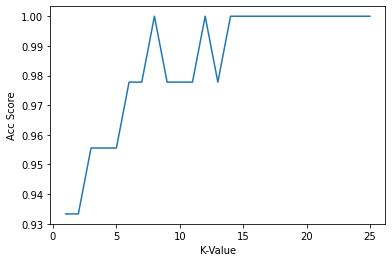

In [38]:
plt.plot(k_range,scores)
plt.xlabel("K-Value")
plt.ylabel("Acc Score")
plt.show()

In [39]:
km = KMeans(n_clusters=5,random_state=1)
km.fit(x_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [42]:
y_pred_km = km.predict(x_test)
y_pred_km

array([3, 2, 2, 0, 4, 3, 0, 2, 0, 3, 2, 2, 1, 4, 0, 0, 2, 4, 0, 0, 3, 1,
       0, 2, 3, 1, 2, 3, 2, 1, 0, 3, 3, 0, 2, 0, 0, 4, 0, 1, 2, 3, 0, 0,
       2], dtype=int32)

In [41]:
accuracy_score(y_test,y_pred_km)

0.0

In [47]:

km.labels_

array([2, 2, 1, 4, 0, 2, 0, 0, 0, 0, 2, 2, 3, 3, 2, 3, 1, 1, 2, 0, 2, 0,
       2, 1, 3, 1, 3, 2, 2, 3, 3, 1, 2, 0, 2, 0, 0, 3, 0, 0, 4, 3, 0, 1,
       0, 2, 3, 0, 0, 1, 2, 3, 0, 0, 1, 2, 2, 0, 2, 2, 3, 0, 3, 1, 1, 1,
       1, 0, 0, 2, 4, 0, 2, 0, 0, 1, 2, 4, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0,
       3, 2, 1, 2, 0, 2, 0, 0, 3, 2, 0, 1, 0, 2, 1, 4, 3], dtype=int32)

In [46]:

km.cluster_centers_

array([[5.        , 3.44      , 1.45142857, 0.23142857],
       [6.66190476, 3.07619048, 5.57142857, 2.0952381 ],
       [6.20714286, 2.85714286, 4.71071429, 1.57142857],
       [5.4625    , 2.55      , 3.89375   , 1.19375   ],
       [7.72      , 3.2       , 6.66      , 2.12      ]])

In [49]:
Error = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x_train)
  Error.append(kmeans.inertia_)

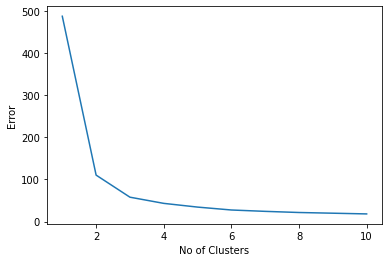

In [50]:
plt.plot(range(1,11),Error)
plt.xlabel("No of Clusters")
plt.ylabel("Error")
plt.show()